# Week 6 Session 2  - Image processing with Python and OpenCV

## Image Segmentation with Distance Transform and Watershed Algorithm

### Watershed Segmentation Basics
https://people.cmm.minesparis.psl.eu/users/beucher/wtshed.html#watshed

# Import libraries 





In [ ]:
from __future__ import print_function
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
import requests

# scikit-image (a.k.a. skimage ) is a collection of algorithms for image processing and computer vision.
# io is image input output module
from skimage import io

random.seed(12345)

### Loading the image and checking if it is loaded without any problem

(346, 497, 3)


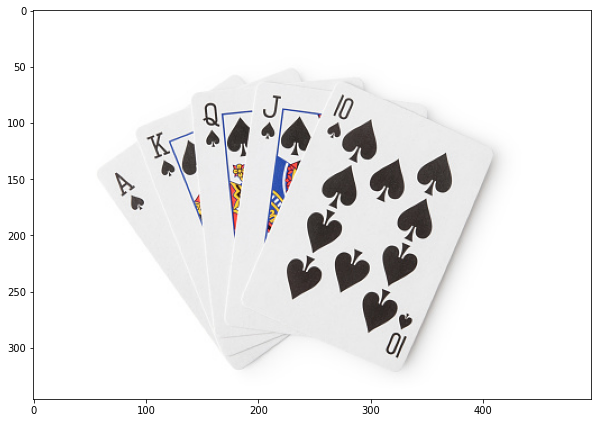

In [ ]:
# io.imread return an image array for the provided image. Can extract image information from the links also.
# importing many images, you can choose which you like to process
# https://scikit-image.org/docs/dev/api/skimage.io.html#imread

src = io.imread("https://media.istockphoto.com/photos/playing-cards-picture-id496913440?k=20&m=496913440&s=170667a&w=0&h=6AZI4Ch9_9sxFE0Zux_eIOlE3lKMi8HqIp05OECZwVs=")
#src = io.imread("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcShID4pxKM2ZHzFtL5_1_UzmLRaLhVL9-GTHA&usqp=CAU")
#src = io.imread("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS2rdSGhan5l9tyOmoMZOn5io5gMMxoPd146A&usqp=CAU")
#src = io.imread("https://m.media-amazon.com/images/I/71h6br16TlL._SL1100_.jpg")
#src = io.imread("https://c8.alamy.com/comp/2AENGEE/data-processing-cycle-2AENGEE.jpg")


print(src.shape)
plt.figure(figsize = (10,10))
plt.imshow(src)
plt.show()

### All the above images have white background. We will change the background from white to black, since that will help later to extract better results during the use of Distance Transform

In [ ]:
# changing pixel values from 255 to 0 to convert from white to black
src[] = 0

# Show output image
plt.figure(figsize = (10,10))
plt.imshow(src)
plt.show()

SyntaxError: ignored

### Afterwards we will sharpen our image in order to acute the edges of the foreground objects. 

1.   We will apply a laplacian filter with an approximation of second derivative:
https://www.l3harrisgeospatial.com/docs/laplacianfilters.html#:~:text=A%20Laplacian%20filter%20is%20an,an%20edge%20or%20continuous%20progression.

2.   Effects of Laplacian Filters: 
https://bohr.wlu.ca/hfan/cp467/12/notes/cp467_12_lecture6_sharpening.pdf



In [ ]:
# Create a kernel that we will use to sharpen our image
# an approximation of second derivative, quite a strong kernel
kernel = 

# do the laplacian filtering as it is
# well, we need to convert everything in something more deeper then CV_8U
# because the kernel has some negative values,
# and we can expect in general to have a Laplacian image with negative values
# BUT a 8bits unsigned int (the one we are working with) can contain values from 0 to 255
# so the possible negative number will be truncated

# https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04
imgLaplacian = cv2.filter2D(src, cv2.CV_32F, kernel)
sharp = np.float32(src)

# Sharpened image = Original image – Edge detected image if the central pixel of Laplacian filter is a negative value.
imgResult = 

# convert back to 8bits gray scale - some values have gone beyond [0, 255]
# https://numpy.org/doc/stable/reference/generated/numpy.clip.html
imgResult = 
imgResult = 
imgLaplacian = 
imgLaplacian = 

#cv.imshow('Laplace Filtered Image', imgLaplacian)
plt.figure(figsize = (10,10))
plt.imshow(imgResult)
plt.show()

### Now we transform our new sharpened source image to a grayscale and a binary one, respectively

In [ ]:
# Creating binary image from source image
# https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab
bw = 

# https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html
_, bw = 

plt.figure(figsize = (10,10))
plt.imshow(bw, cmap = 'gray')
plt.show()

### We are ready now to apply the Distance Transform on the binary image. Moreover, we normalize the output image in order to be able visualize and threshold the result

1.   The distance transform provides a metric or measure of the separation of points in the image.
2.   The distance transform is an operator normally only applied to binary images. The result of the transform is a graylevel image that looks similar to the input image, except that the graylevel intensities of points inside foreground regions are changed to show the distance to the closest boundary from each point.


### Basically, FOREGROUND extraction!

In [ ]:
# Perform the distance transform algorithm
# https://docs.opencv.org/3.4/d7/d1b/group__imgproc__misc.html#ga8a0b7fdfcb7a13dde018988ba3a43042
dist = 

# Normalize the distance image for range = {0.0, 1.0}
# so we can visualize and threshold it
# https://docs.opencv.org/3.4/d2/de8/group__core__array.html#ga7bcf47a1df78cf575162e0aed44960cb
cv2.normalize(dist, dist, 0, 1.0, cv2.NORM_MINMAX)
plt.figure(figsize = (10,10))
plt.imshow(dist, cmap = 'gray')
plt.show()

### We threshold the dist image and then perform some morphology operation (i.e. dilation) in order to extract the peaks from the above image

### We could also use cv.ConnectedComponents() - given the extracted foreground has continuous features - like this example:
https://docs.opencv.org/4.x/d3/db4/tutorial_py_watershed.html

In [ ]:
# Threshold to obtain the peaks
# This will be the markers for the foreground objects
_, dist = cv2.threshold(dist, 0.4, 1.0, cv2.THRESH_BINARY)

# Dilate a bit the dist image 
kernel1 = np.ones((3,3), dtype=np.uint8)
dist = 

plt.figure(figsize = (10,10))
plt.imshow(dist, cmap = 'gray')
plt.show()

### From each blob then we create a seed/marker for the watershed algorithm with the help of the cv::findContours function

In [ ]:
# Create the CV_8U version of the distance image
# It is needed for findContours()
dist_8u = dist.astype('uint8')

# Find total markers
contours, _ = cv2.findContours(dist_8u, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create the marker image for the watershed algorithm
markers = np.zeros(dist.shape, dtype=np.int32)

# Draw the foreground markers
for i in range(len(contours)):
    cv2.drawContours(markers, contours, i, (i+1), -1)

# Draw the background marker
cv2.circle(markers, (5,5), 3, (255, 255, 255), -1)

markers_8u = (markers * 10).astype('uint8')

plt.figure(figsize = (10,10))
plt.imshow(markers_8u, cmap = 'gray')
plt.show()

### Side Note on CV_8U, and some other versions of images in OpenCV: 

1.   CV_8U is unsigned 8bit/pixel - ie a pixel can have values 0-255, this is the normal range for most image and video formats.

2.   CV_32F is float - the pixel can have any value between 0-1.0, this is useful for some sets of calculations on data - but it has to be converted into 8bits to save or display by multiplying each pixel by 255.

3. CV_32S is a signed 32bit integer value for each pixel - again useful of you are doing integer maths on the pixels, but again needs converting into 8bits to save or display. This is trickier since you need to decide how to convert the much larger range of possible values (+/- 2billion!) into 0-255



### Finally, we can apply the watershed algorithm, and visualize the result

### But look at this neat example first: 
https://www.aegissofttech.com/articles/watershed-algorithm-and-limitations.html

1.   Watershed algorithm does not always perform this neatly - why? 
2.   Let's have a look at our segmented image.



In [ ]:
# Perform the watershed algorithm


# mark = np.zeros(markers.shape, dtype=np.uint8)
mark = markers.astype('uint8')
mark = cv2.bitwise_not(mark)

# uncomment this if you want to see how the mark
# image looks like at that point
#cv.imshow('Markers_v2', mark)

# Generate random colors
colors = []
for contour in contours:
    colors.append()

# Create the result image
dst = np.zeros((markers.shape[0], markers.shape[1], 3), dtype=np.uint8)

# Fill labeled objects with random colors
for i in range(markers.shape[0]):
    for j in range(markers.shape[1]):
        index = markers[i,j]
        if index > 0 and index <= len(contours):
            dst[i,j,:] = colors[index-1]

# Visualize the final image
plt.figure(figsize = (10,10))
plt.imshow(dst)
plt.show()

More Image Processing Tutorials : 

https://scikit-image.org/skimage-tutorials/lectures/1_image_filters.html

https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html

https://homepages.inf.ed.ac.uk/rbf/HIPR2/distance.htm

## In the next session - 
## We will understand the Image Segmentation in depth, and get the Introduction to UNet Architecture for Semantic Segmentation for our project

## Time to practise some questions!

Q-1 Why we have applied laplacian filter over an image. What's will be the changes in the results if we haven't applied it?

In [ ]:
ans = """ """
print(ans) 

Q-2 How can we get the peaks in the image after appling filters over it? Explain the process.

In [ ]:
ans_1 = """ """

print(ans_1)

Q-3 Perform image segmentation on the given below image. Image URL is given below, extract the image with the help of the URL.

Image URL : https://cdn2.vectorstock.com/i/1000x1000/95/31/lamp-idea-icon-object-red-light-white-background-vector-14069531.jpg

1. Load the image and show it. 

2. Apply filter over it to make it sharpen.

3. Convert it into grayscale and normalize the image followed by distance transform.

4. Perform necessary operations and best model to get the results.

5. Plot the results in order to visualize it in a better way.



In [ ]:
# Perform the operations on the given image step by step


#  Thank you for completing the notebook!